# Importy

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

from importlib import reload

### DataLoader
import DataLoader.xAPIConnector
reload(DataLoader.xAPIConnector)
from DataLoader.xAPIConnector import *

import DataLoader.DataLoader
reload(DataLoader.DataLoader)
from DataLoader.DataLoader import *

from DataLoader.config import user_id, pwd


### Data
import Data.SymbolParser
reload(Data.SymbolParser)
from Data.SymbolParser import parse_symbols


### TrendAnalysis
import TrendAnalysis.MACD
reload(TrendAnalysis.MACD)
from TrendAnalysis.MACD import MACD

import TrendAnalysis.MA
reload(TrendAnalysis.MA)
from TrendAnalysis.MA import MA

import TrendAnalysis.RSI
reload(TrendAnalysis.RSI)
from TrendAnalysis.RSI import RSI

### MeanRevert
import MeanRevert.MeanRevert
reload(MeanRevert.MeanRevert)
from MeanRevert.MeanRevert import MeanRevert


### TechFunctions
from TechFunctions.Technicalities import position_encoding

# Właściwy kod

In [2]:
Symbols = parse_symbols()

In [3]:
symbols = Symbols['gold']
start, interval = '2020-01-01', '1D'

dl = DataLoader(user_id, pwd)
data = dl.getData(symbols=symbols, start_date=start, interval=interval, verbose=False)

[BŁĄD] Nie pobrano SA.US
[BŁĄD] Nie pobrano CMCL.US
[BŁĄD] Nie pobrano IDR.US
[BŁĄD] Nie pobrano CTGO.US
[BŁĄD] Nie pobrano FTCO.US
[BŁĄD] Nie pobrano USAU.US


In [4]:
model = MACD(data)
model.Decision()

,NEM.US,AU.US,RGLD.US,CDE.US
Date,,,,
2020-01-02,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0
2020-01-06,0.0,0.0,0.0,0.0
2020-01-07,0.0,0.0,0.0,0.0
2020-01-08,0.0,0.0,0.0,0.0
...,...,...,...,...
2025-01-24,0.0,0.0,0.0,0.0
2025-01-27,0.0,0.0,0.0,0.0
2025-01-28,0.0,0.0,0.0,0.0


In [85]:
model = MACD(data, short_window=5, long_window=12, alpha_EMA=0.25)
model.saveDecision('MACD')

model = MA(data, short_window=5, long_window=14, alpha_EMA=0.25)
model.saveDecision('MA')

model = RSI(data, window=10)
model.saveDecision('RSI')

model = MeanRevert(data)
model.saveDecision('MeanRevert')

## Podsumowanie generowania sygnałów

Umiemy już generować tabele z sygnałami na bazie strategii trend-following i mean-reverting.

In [86]:
for s in [-1.0, 0.0, 1.0]:
    s_str = position_encoding[int(s)]
    
    model = MA(data)
    print(f"Sygnały {s_str} z modelu MA:\n{(model.Decision()==s).sum()}")

    model = MACD(data)
    print(f"Sygnały {s_str} z modelu MACD:\n{(model.Decision()==s).sum()}")

    model = RSI(data)
    print(f"Sygnały {s_str} z modelu RSI:\n{(model.Decision()==s).sum()}")
    
    model = MeanRevert(data)
    print(f"Sygnały {s_str} z modelu Mean-Revert:\n{(model.Decision()==s).sum()}")
    
    print()

Sygnały sell z modelu MA:
MAG.US     27
SVM.US     39
EXK.US     37
FSM.US     36
ASM.US     27
PAAS.US    34
WPM.US     39
dtype: int64
Sygnały sell z modelu MACD:
MAG.US     20
SVM.US     26
EXK.US     26
FSM.US     19
ASM.US     19
PAAS.US    22
WPM.US     25
dtype: int64
Sygnały sell z modelu RSI:
MAG.US      4
SVM.US      6
EXK.US      7
FSM.US     11
ASM.US      6
PAAS.US     6
WPM.US      9
dtype: int64
Sygnały sell z modelu Mean-Revert:
MAG.US      86
SVM.US     173
EXK.US     156
FSM.US     122
ASM.US     136
PAAS.US    118
WPM.US     115
dtype: int64

Sygnały hold z modelu MA:
MAG.US     3887
SVM.US     3863
EXK.US     3867
FSM.US     3869
ASM.US     3887
PAAS.US    3873
WPM.US     3863
dtype: int64
Sygnały hold z modelu MACD:
MAG.US     3901
SVM.US     3889
EXK.US     3889
FSM.US     3903
ASM.US     3903
PAAS.US    3897
WPM.US     3891
dtype: int64
Sygnały hold z modelu RSI:
MAG.US     3900
SVM.US     3868
EXK.US     3876
FSM.US     3877
ASM.US     3877
PAAS.US    3891
WPM.U

Łączny zysk z NEM.US: 1.6899999999999764
Łączny zysk z AU.US: 39.829999999999984
Łączny zysk z RGLD.US: 181.54999999999998
Łączny zysk z CDE.US: 10.989999999999998
Łączny zysk z NEM.US: -6.950000000000024
Łączny zysk z AU.US: 23.579999999999984
Łączny zysk z RGLD.US: 97.86000000000004
Łączny zysk z CDE.US: -7.4600000000000035
Łączny zysk z NEM.US: 26.939999999999976
Łączny zysk z AU.US: -8.719999999999999
Łączny zysk z RGLD.US: 40.61000000000004
Łączny zysk z CDE.US: -4.880000000000002
Łączny zysk z NEM.US: -55.64999999999997
Łączny zysk z AU.US: 11.159999999999993
Łączny zysk z RGLD.US: 61.84999999999995
Łączny zysk z CDE.US: 4.9200000000000035


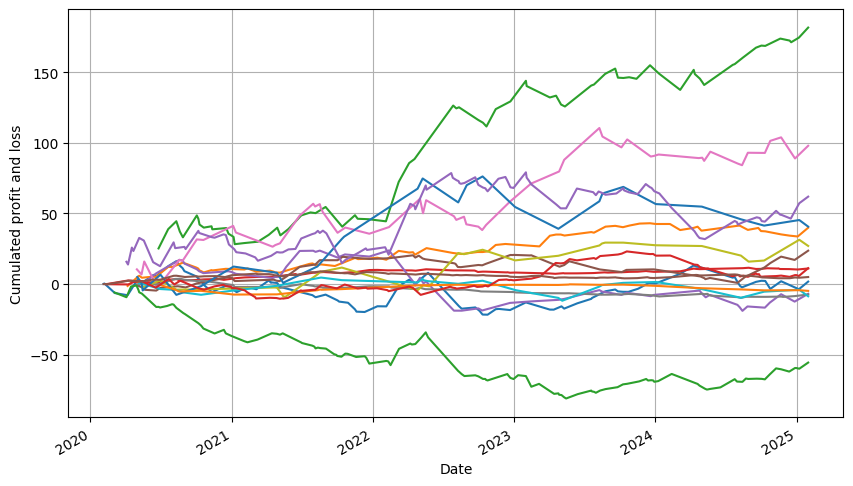

In [8]:
from TechFunctions.Technicalities import backtest_strategy

returns_dict = {}

for model_name in ['MA', 'MACD', 'RSI', 'MeanRevert']:
    
    returns_dict[model_name] = {}
    
    if model_name == 'MA': model = MA(data, short_window=5, long_window=12)
    elif model_name == 'MACD': model = MACD(data, short_window=5, long_window=12)
    elif model_name == 'RSI': model = RSI(data)
    elif model_name == 'MeanRevert': model = MeanRevert(data)
    
    for symbol in data.columns:
        
        if symbol in materials:
            continue
        
        y = data.loc[:, symbol]
        signal = model.Decision().loc[:, symbol]

        data_to_backtest = pd.DataFrame([y, signal]).T.dropna()
        data_to_backtest.columns = ['price', 'signal']
        data_to_backtest['sl'] = ((data_to_backtest['signal'] != 0)*1.0).shift(-1)
        data_to_backtest['tp'] = 0.0

        backtest_data = backtest_strategy(data_to_backtest, 'price', 'sl', 'tp', 'signal')

        pnl = pd.Series(backtest_data['pnl'])
        pnl.index = backtest_data['exit_index']
        pnl.index.rename('Date', inplace=True)

        pnl.cumsum().plot(figsize=(10, 6),
                        grid=True,
                        ylabel='Cumulated profit and loss')
        
        returns_dict[model_name][symbol] = pnl.sum()
        
        print(f"Łączny zysk z {symbol}: {pnl.sum()}")

In [9]:
pd.DataFrame(returns_dict)

,MA,MACD,RSI,MeanRevert
NEM.US,1.69,-6.95,26.94,-55.65
AU.US,39.83,23.58,-8.72,11.16
RGLD.US,181.55,97.86,40.61,61.85
CDE.US,10.99,-7.46,-4.88,4.92


Generujemy sygnały osobno dla każdej spółki

In [88]:
data

,MAG.US,SVM.US,EXK.US,FSM.US,ASM.US,PAAS.US,WPM.US,GOLD,COPPER,ALUMINIUM,SILVER
Date,,,,,,,,,,,
2010-01-04,NaN,6.17,3.89,NaN,NaN,24.68,15.76,1120.43,7450.0,NaN,NaN
2010-01-05,NaN,6.23,4.06,NaN,NaN,24.76,16.11,1116.55,7460.0,NaN,NaN
2010-01-06,NaN,6.55,4.21,NaN,NaN,25.29,16.70,1137.23,7632.0,NaN,NaN
2010-01-07,NaN,6.57,4.27,NaN,NaN,25.27,NaN,NaN,7493.0,2337.0,NaN
2010-01-08,NaN,6.57,4.28,2.61,NaN,25.68,17.17,1135.90,7468.0,2268.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24,15.12,3.09,3.65,4.44,1.15,22.38,59.67,2770.92,9247.0,2633.0,30.622
2025-01-27,14.41,2.97,3.42,4.30,1.11,21.68,58.71,2740.44,9087.0,2606.0,30.170
2025-01-28,14.61,3.00,3.60,4.52,1.13,21.95,60.13,2762.99,9009.0,2571.0,30.395


In [92]:
import os

folder_path = 'Data/Backtests'
start, interval = '2010-01-01', '1D'

for key in Symbols.keys():
    print(key)
    symbols = Symbols[key]
    
    dl = DataLoader(user_id, pwd)
    data = dl.getData(symbols=symbols, start_date=start, interval=interval, verbose=False)

    for symbol in data.columns:
        
        if symbol in materials:
            continue
        
        print('\t'+symbol)
        for model_name in ['MA', 'MACD', 'RSI', 'MeanRevert']:
            print('\t\t'+model_name)
            if model_name == 'MA': model = MA(data, short_window=5, long_window=12)
            elif model_name == 'MACD': model = MACD(data, short_window=5, long_window=12)
            elif model_name == 'RSI': model = RSI(data)
            elif model_name == 'MeanRevert': model = MeanRevert(data)
            
            y = data.loc[:, symbol]
            signal = model.Decision().loc[:, symbol]

            data_to_backtest = pd.DataFrame([y, signal]).T.dropna()
            data_to_backtest.columns = ['price', 'signal']
            data_to_backtest['sl'] = ((data_to_backtest['signal'] != 0)*1.0).shift(-1)
            data_to_backtest['tp'] = 0.0

            backtest_data = backtest_strategy(data_to_backtest, 'price', 'sl', 'tp', 'signal')

            pnl = pd.Series(backtest_data['pnl'])
            pnl.index = backtest_data['exit_index']
            pnl.index.rename('Date', inplace=True)

            cum_pnl = pnl.cumsum()
            
            path = f"{folder_path}/{key.upper()}/{symbol}/"
            if not os.path.exists(path):
                os.makedirs(path)
            
            cum_pnl.to_csv(f"{path}/{model_name}_signals.csv")

gold
[BŁĄD] Nie pobrano CDE.US
[BŁĄD] Nie pobrano SA.US
[BŁĄD] Nie pobrano CMCL.US
[BŁĄD] Nie pobrano IDR.US
[BŁĄD] Nie pobrano CTGO.US
[BŁĄD] Nie pobrano FTCO.US
[BŁĄD] Nie pobrano USAU.US
	NEM.US
		MA
		MACD
		RSI
		MeanRevert
	AU.US
		MA
		MACD
		RSI
		MeanRevert
	RGLD.US
		MA
		MACD
		RSI
		MeanRevert
copper
[BŁĄD] Nie pobrano FCX.US
[BŁĄD] Nie pobrano MTAL.US
[BŁĄD] Nie pobrano IE.US
	SCCO.US
		MA
		MACD
		RSI
		MeanRevert
aluminium
[BŁĄD] Nie pobrano CENX.US
[BŁĄD] Nie pobrano CSTM.US
	AA.US
		MA
		MACD
		RSI
		MeanRevert
	KALU.US
		MA
		MACD
		RSI
		MeanRevert
silver
[BŁĄD] Nie pobrano AG.US
[BŁĄD] Nie pobrano AYASF.US
[BŁĄD] Nie pobrano HL.US
	MAG.US
		MA
		MACD
		RSI
		MeanRevert
	SVM.US
		MA
		MACD
		RSI
		MeanRevert
	EXK.US
		MA
		MACD
		RSI
		MeanRevert
	FSM.US
		MA
		MACD
		RSI
		MeanRevert
	ASM.US
		MA
		MACD
		RSI
		MeanRevert
	PAAS.US
		MA
		MACD
		RSI
		MeanRevert
	WPM.US
		MA
		MACD
		RSI
		MeanRevert
